In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [3]:
# Load the file to inspect its contents
directory = r'C:\Users\adamf\Documents\PhD\Diffraction\RV-DAT\\'
csv_files = glob.glob(os.path.join(directory, '*.csv'))
rawData_list = [pd.read_csv(file) for file in csv_files]
rawData = pd.concat(rawData_list, ignore_index=True)
data = rawData
# Forward fill missing values to ensure each timestamp has the most recent value for each position
posCols = ['position_x','position_y','position_z','earth_unit_vector_x','earth_unit_vector_y','earth_unit_vector_z','right_ascension','declination']
for posCol in posCols:
    data[posCol] = rawData[posCol].ffill()

# Display the first few rows of the cleaned dataframe
data.head(10)

,time,frequency_band,position_x,position_y,position_z,earth_unit_vector_x,earth_unit_vector_y,earth_unit_vector_z,right_ascension,declination,rv1_coarse,rv2_coarse,rv1_fine,rv2_fine,rv_temp
0,1973-07-12 21:05:05.028,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
1,1973-07-12 21:05:06.953,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
2,1973-07-12 21:05:08.878,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
3,1973-07-12 21:05:10.803,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
4,1973-07-12 21:05:12.728,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
5,1973-07-12 21:05:14.653,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
6,1973-07-12 21:05:16.578,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
7,1973-07-12 21:05:18.503,6,-486.228760,2204.672363,-1667.800049,0.142523,0.897716,0.416884,6.139223,-32.98761,NaN,NaN,NaN,NaN,1092742021
8,1973-07-12 21:07:23.257,6,-664.042969,2184.975098,-1631.735352,0.142197,0.897772,0.416877,6.430655,-32.47612,NaN,NaN,NaN,NaN,1092742021
9,1973-07-12 21:07:25.182,6,-664.042969,2184.975098,-1631.735352,0.142197,0.897772,0.416877,6.430655,-32.47612,NaN,NaN,NaN,NaN,1092742021


In [4]:
data['time'] = pd.to_datetime(data['time'])

In [5]:
dataClean = data.dropna(subset=['position_x','position_y', 'position_z'])

In [6]:
bounds = {
    'position_x': {'lower': -4000, 'upper': 4000},
    'position_y': {'lower': -4000, 'upper': 4000},
    'position_z': {'lower': -3000, 'upper': 3000}
}
mask = (dataClean['position_x'] >= bounds['position_x']['lower']) & (dataClean['position_x'] <= bounds['position_x']['upper']) & \
       (dataClean['position_y'] >= bounds['position_y']['lower']) & (dataClean['position_y'] <= bounds['position_y']['upper']) & \
       (dataClean['position_z'] >= bounds['position_z']['lower']) & (dataClean['position_z'] <= bounds['position_z']['upper'])
dataFilter = dataClean[mask]
print(len(dataFilter))
print(len(dataClean))

17503328
17503360


In [7]:
timestamp = '1973-07-13 01:48:42.379'
timestamp = pd.Timestamp(timestamp)
df = dataFilter.set_index('time')
df.sort_values(by=['time'],inplace=True)
#df.head(40)
if timestamp in df.index:
    idx = df.index.get_loc(timestamp)
    
    #Select 100 rows before and after the identified row
    start_idx = max(0, idx - 100)
    end_idx = min(len(df), idx + 100 + 1)
    df = df.iloc[start_idx:end_idx]
    
df.head(10)

,frequency_band,position_x,position_y,position_z,earth_unit_vector_x,earth_unit_vector_y,earth_unit_vector_z,right_ascension,declination,rv1_coarse,rv2_coarse,rv1_fine,rv2_fine,rv_temp
time,,,,,,,,,,,,,,
1973-07-13 01:45:30.417,7,-2701.800293,-399.529785,628.083252,0.102785,0.903726,0.415588,11.937054,12.071523,476428.9375,346083.875,4.328219e+05,393930.3125,1092721049
1973-07-13 01:45:32.342,7,-2701.800293,-399.529785,628.083252,0.102785,0.903726,0.415588,11.937054,12.071523,436870.6250,396788.625,NaN,NaN,1092721049
1973-07-13 01:45:34.267,7,-2701.800293,-399.529785,628.083252,0.102785,0.903726,0.415588,11.937054,12.071523,527312.9375,425356.875,NaN,NaN,1092721049
1973-07-13 01:45:36.192,7,-2701.800293,-399.529785,628.083252,0.102785,0.903726,0.415588,11.937054,12.071523,436870.6250,396788.625,NaN,NaN,1092721049
1973-07-13 01:45:38.076,6,-2696.638428,-415.294678,639.808838,0.102749,0.903731,0.415587,11.959270,12.326778,NaN,NaN,1.007898e+06,587550.8750,1092721049
1973-07-13 01:45:40.001,6,-2696.638428,-415.294678,639.808838,0.102749,0.903731,0.415587,11.959270,12.326778,688514.8750,513250.625,NaN,NaN,1092721049
1973-07-13 01:45:41.926,6,-2696.638428,-415.294678,639.808838,0.102749,0.903731,0.415587,11.959270,12.326778,688514.8750,513250.625,NaN,NaN,1092721049
1973-07-13 01:45:43.851,6,-2696.638428,-415.294678,639.808838,0.102749,0.903731,0.415587,11.959270,12.326778,688514.8750,439741.875,NaN,NaN,1092721049
1973-07-13 01:45:45.776,6,-2696.638428,-415.294678,639.808838,0.102749,0.903731,0.415587,11.959270,12.326778,688514.8750,487475.500,9.789606e+05,587550.8750,1092721049


In [8]:
df.dropna(subset=['rv1_coarse','rv2_coarse'],inplace=True)
df.reset_index(inplace = True)
df['timeStart'] = (df['time']-df['time'].iloc[0]).dt.total_seconds()

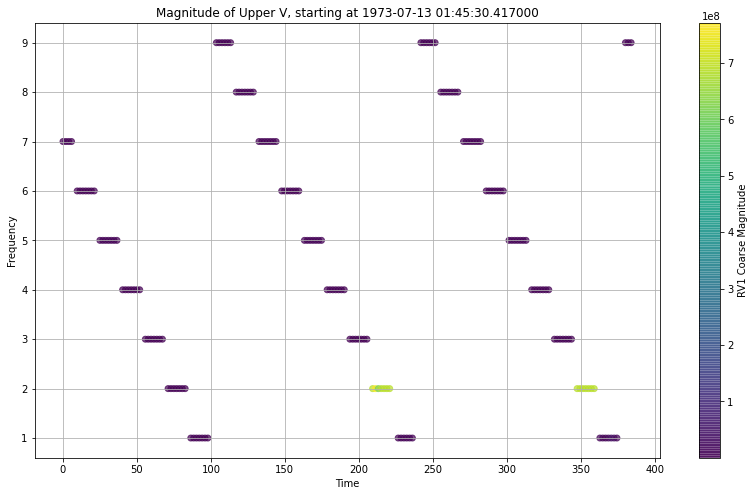

In [9]:

plt.figure(figsize=(14, 8))


scatter = plt.scatter(df['timeStart'], df['frequency_band'], c=df['rv1_coarse'], cmap='viridis', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title(f'Magnitude of Upper V, starting at {df["time"].iloc[0]}')
cbar = plt.colorbar(scatter)
cbar.set_label('RV1 Coarse Magnitude')
time_ticks = pd.to_datetime(plt.gca().get_xticks())
plt.grid(True)
plt.show()

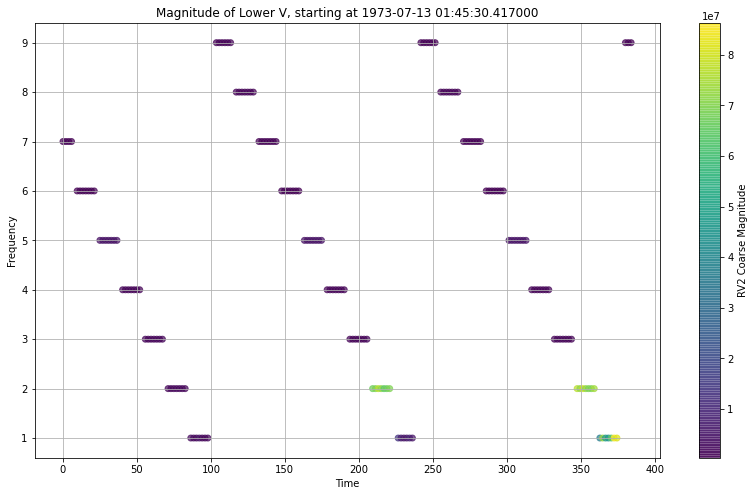

In [10]:
plt.figure(figsize=(14, 8))


scatter = plt.scatter(df['timeStart'], df['frequency_band'], c=df['rv2_coarse'], cmap='viridis', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title(f'Magnitude of Lower V, starting at {df["time"].iloc[0]}')
cbar = plt.colorbar(scatter)
cbar.set_label('RV2 Coarse Magnitude')
time_ticks = pd.to_datetime(plt.gca().get_xticks())
plt.grid(True)
plt.show()

In [12]:
boundsCoarse = {'rv1_coarse': {'lower': 0, 'upper': 9e6},'rv2_coarse': {'lower': 0, 'upper': 9e6}}
mask = (df['rv1_coarse'] >= boundsCoarse['rv1_coarse']['lower']) & (df['rv1_coarse'] <= boundsCoarse['rv1_coarse']['upper'])&\
    (df['rv2_coarse'] >= boundsCoarse['rv2_coarse']['lower']) & (df['rv2_coarse'] <= boundsCoarse['rv2_coarse']['upper'])
df_lower = df[mask]

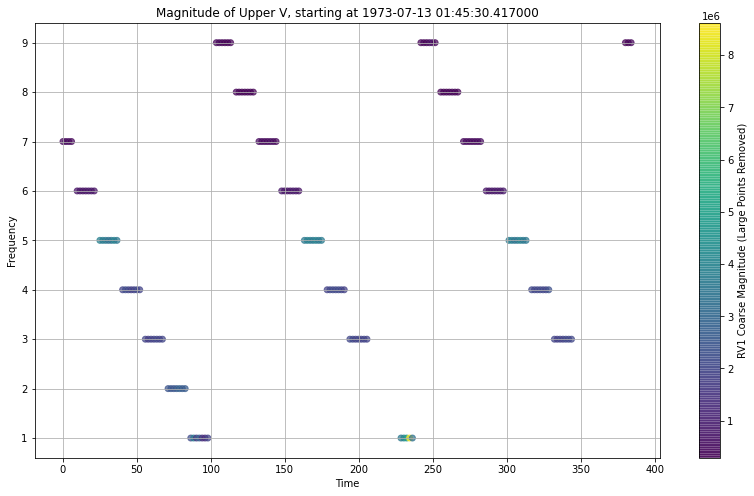

In [13]:
plt.figure(figsize=(14, 8))


scatter = plt.scatter(df_lower['timeStart'], df_lower['frequency_band'], c=df_lower['rv1_coarse'], cmap='viridis', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title(f'Magnitude of Upper V, starting at {df["time"].iloc[0]}')
cbar = plt.colorbar(scatter)
cbar.set_label('RV1 Coarse Magnitude (Large Points Removed)')
time_ticks = pd.to_datetime(plt.gca().get_xticks())
plt.grid(True)
plt.show()

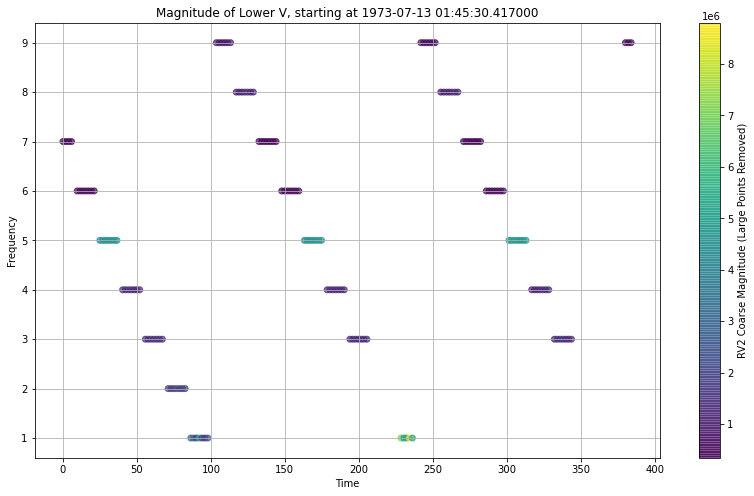

In [14]:
plt.figure(figsize=(14, 8))


scatter = plt.scatter(df_lower['timeStart'], df_lower['frequency_band'], c=df_lower['rv2_coarse'], cmap='viridis', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title(f'Magnitude of Lower V, starting at {df["time"].iloc[0]}')
cbar = plt.colorbar(scatter)
cbar.set_label('RV2 Coarse Magnitude (Large Points Removed)')
time_ticks = pd.to_datetime(plt.gca().get_xticks())
plt.grid(True)
plt.show()

In [15]:
boundsFreq = {'frequency': {'val':1}}
mask = (df['frequency_band'] == boundsFreq['frequency']['val'])
df_1 = df[mask]


Text(0.5, 1.0, 'Frequency = 0.45 MHz')

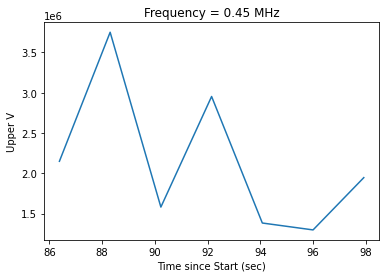

In [16]:
plt.plot(df_1['timeStart'][0:7],df_1['rv1_coarse'][0:7])
plt.ylabel("Upper V")
plt.xlabel("Time since Start (sec)")
plt.title("Frequency = 0.45 MHz")

Text(0.5, 1.0, 'Frequency = 0.45 MHz')

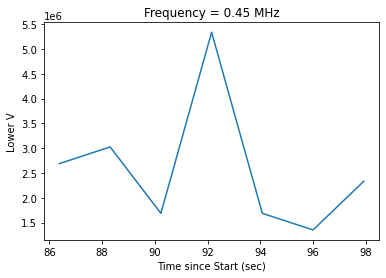

In [18]:
plt.plot(df_1['timeStart'][0:7],df_1['rv2_coarse'][0:7])
plt.ylabel("Lower V")
plt.xlabel("Time since Start (sec)")
plt.title("Frequency = 0.45 MHz")

Text(0.5, 1.0, 'Frequency = 0.45 MHz')

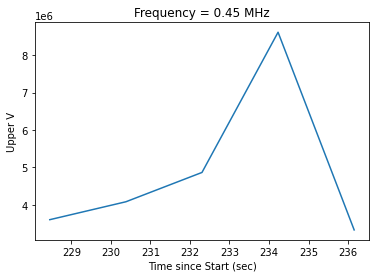

In [25]:
plt.plot(df_1['timeStart'][8:13],df_1['rv1_coarse'][8:13])
plt.ylabel("Upper V")
plt.xlabel("Time since Start (sec)")
plt.title("Frequency = 0.45 MHz")

Text(0.5, 1.0, 'Frequency = 0.45 MHz')

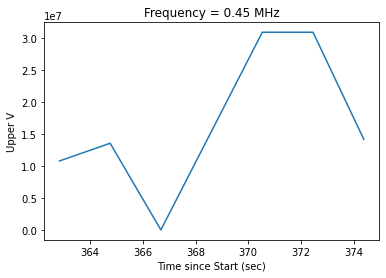

In [26]:
plt.plot(df_1['timeStart'][13:],df_1['rv1_coarse'][13:])
plt.ylabel("Upper V")
plt.xlabel("Time since Start (sec)")
plt.title("Frequency = 0.45 MHz")

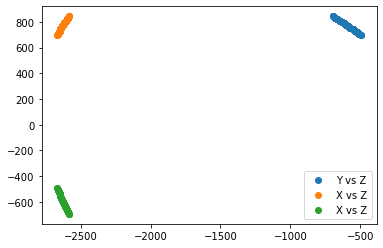

In [29]:
plt.scatter(df['position_y'],df['position_z'],label = 'Y vs Z')
plt.scatter(df['position_x'],df['position_z'],label = 'X vs Z')
plt.scatter(df['position_x'],df['position_y'],label = 'X vs Z')
plt.legend()

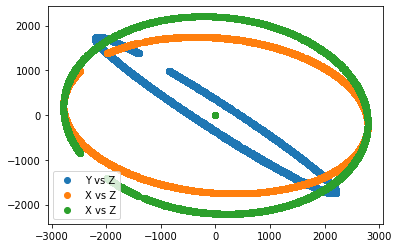

In [6]:
start_time = '1973-07-15 22:50:32'
end_time = '1973-07-16 6:00:00'
dataPeriod = dataFilter[(dataFilter['time'] >= start_time) & (dataFilter['time'] <= end_time)]
plt.scatter(dataPeriod['position_y'],dataPeriod['position_z'],label = 'Y vs Z')
plt.scatter(dataPeriod['position_x'],dataPeriod['position_z'],label = 'X vs Z')
plt.scatter(dataPeriod['position_x'],dataPeriod['position_y'],label = 'X vs Z')
plt.legend()

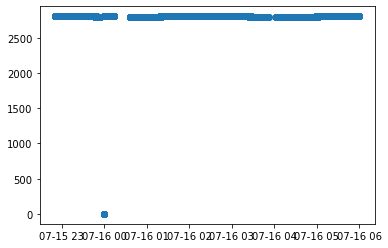

In [7]:
plt.scatter(dataPeriod['time'],np.sqrt(dataPeriod['position_x']**2+dataPeriod['position_y']**2+dataPeriod['position_z']**2))

In [8]:
r = np.sqrt(dataFilter['position_x']**2+dataFilter['position_y']**2+dataFilter['position_z']**2)
latitude = np.degrees(np.arcsin(dataFilter['position_z']/ r))
longitude = np.degrees(np.arctan2(dataFilter['position_y'], dataFilter['position_x']))
height = r*10**3 - 1740e3
df =  pd.DataFrame({
    'time': dataFilter['time'],
    'latitude': latitude,
    'longitude': longitude,
    'height': height
})
df.to_csv('positionData.csv', index=False)